In [1]:
import numpy as np
import scanpy as sc
from sklearn import decomposition, manifold
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [2]:
lymphoid_lsi = pd.read_csv("lymphoid_lsi.csv", sep=",",index_col=0)
# the first LSI dimension is highly correlated with sequencing depth in that case, as sometimes happens with scATAC-seq data. 
# For this reason we discard the first component for downstream analysis.
lymphoid_lsi2 = lymphoid_lsi.iloc[:,1:50]

In [3]:
lymphoid_celltype = pd.read_csv("lymphoid_celltype.csv", sep=",",index_col=0)
lymphoid_celltype_values = lymphoid_celltype['x'].values
lymphoid_monocle = pd.read_csv("lymphoid_monocle_pseudotime.csv", sep=",",index_col=0)
lymphoid_monocle_time = lymphoid_monocle['x'].values

zip_types = dict(zip(set(lymphoid_celltype_values),np.arange(1,8,1)))
cell_clusters  =  [zip_types[i] for i in lymphoid_celltype_values]

In [5]:
ad = sc.AnnData(X = lymphoid_lsi2)
ad.uns['iroot']= 3047
ad.obs['cluster'] = lymphoid_celltype_values

In [6]:
sc.pp.neighbors(ad, 30)
sc.tl.diffmap(ad, 30)
sc.tl.dpt(ad,  copy=False)

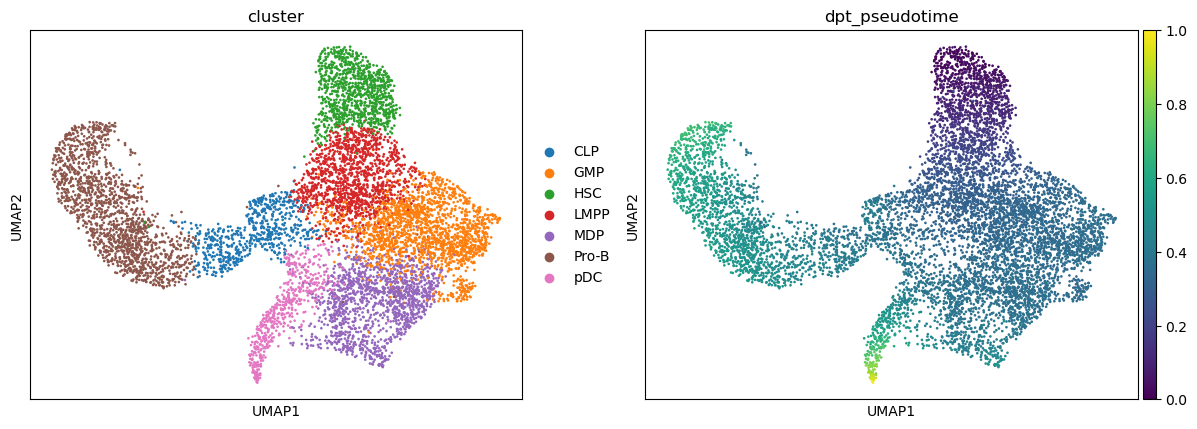

In [8]:
sc.tl.umap(ad)
sc.pl.umap(ad, color=['cluster','dpt_pseudotime'])

In [9]:
ad.obs['dpt_pseudotime'].to_csv('lymphoid.dpt_pseudotime.csv')

In [11]:
ad.obsm['X_pca'] = lymphoid_lsi2
sc.external.tl.palantir(ad)

In [12]:
pal_res = sc.external.tl.palantir_results(ad,early_cell=ad.obs_names[3047])

Sampling and flocking waypoints...
Time for determining waypoints: 0.008353320757548015 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.18770471413930256 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


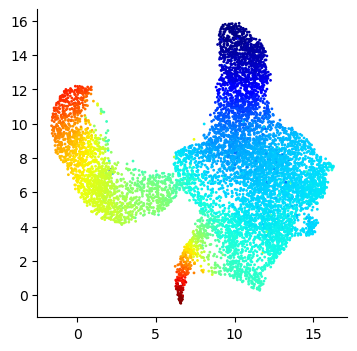

In [13]:
X_umap = ad.obsm['X_umap']
plt.scatter(X_umap[:,0],X_umap[:,1], s =1,c=pal_res.pseudotime.values,cmap="jet") 
plt.show()

In [15]:
pal_res.pseudotime.to_csv('lymphoid.palantir_pseudotime.csv')